# Lista 4 - Metodos Numericos I

## Importando pacotes

In [105]:
from methods.polynomial_regression import create_augmented_matrix, retrieve_poly_coef
from methods.multiple_regression import determinate_elements, retrieve_multiple_coef
from methods.linear_regression import linear_regression
from matplotlib import pyplot as plt
from numpy.typing import NDArray
import numpy as np

### Questao 1

In [106]:
x :NDArray = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                      dtype=np.float64)
y :NDArray = np.array([17, 24, 31, 33, 37, 37, 40, 40, 42, 41],
                      dtype=np.float64)

#### a) uma reta

In [107]:
a0, a1, erro_padrao_estimativa, r2 = linear_regression(x, y)
print("Coeficiente linear (a0): ", a0)
print("Coeficiente angular (a1): ", a1)
print("Erro padrão da estimativa: ", erro_padrao_estimativa)
print("Coeficiente de determinação (r^2): ", r2)

Coeficiente linear (a0):  20.6
Coeficiente angular (a1):  0.49454545454545457
Erro padrão da estimativa:  3.485032933195115
Coeficiente de determinação (r^2):  0.9075072476309982


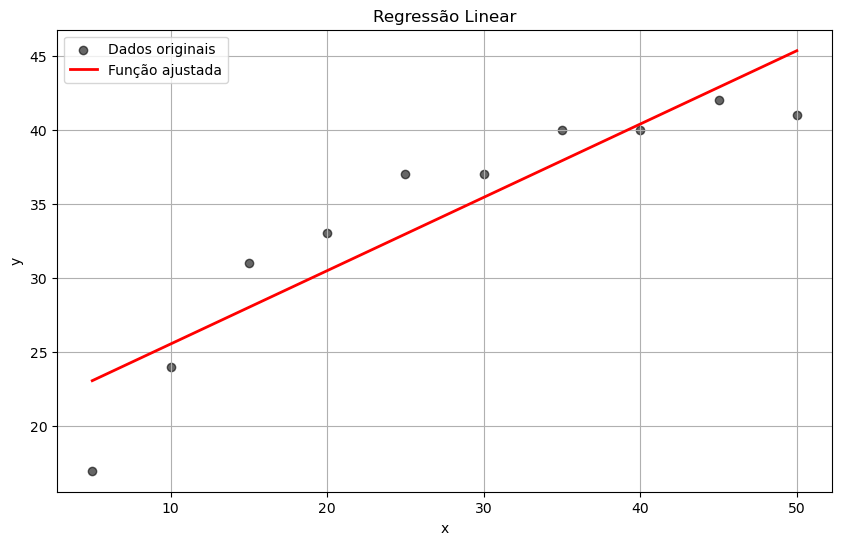

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Dados originais", color="black", alpha=0.6)
plt.title("Regressão Linear")
plt.plot(x, (a0 + a1 * x), color="red", linewidth=2, label="Função ajustada")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

#### b) y = αe^β

In [109]:
y_exp :NDArray = np.log(y)
alfa_estimado, a1, erro_padrao_estimativa, r2 = linear_regression(x, y_exp)
print("alfa estimado: ", alfa_estimado, "\nBeta estimado: ", a1)

alfa estimado:  3.042855971037079 
Beta estimado:  0.01659650417632365


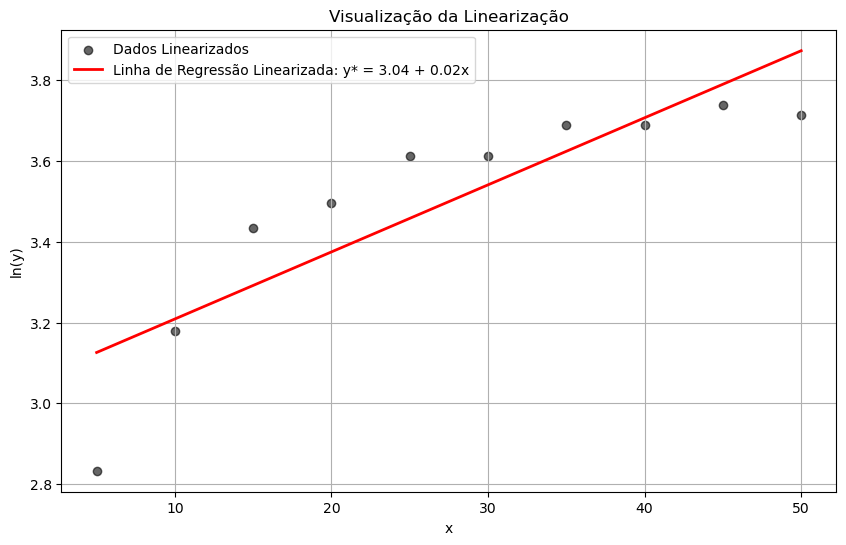

In [110]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y_exp, label="Dados Linearizados", color="black", alpha=0.6)
plt.plot(x, (alfa_estimado + a1 * x), color="red", linewidth=2,
         label=f"Linha de Regressão Linearizada: y* = {alfa_estimado:.2f} + {a1:.2f}x")
plt.title("Visualização da Linearização")
plt.xlabel("x")
plt.ylabel("ln(y)")
plt.grid(True)
plt.legend()
plt.show()

In [111]:
a0 = np.exp(alfa_estimado)
print("a0 = ", a0, "\na1 = ", a1)
print("Erro padrão da estimativa: ", erro_padrao_estimativa)
print("Coeficiente de determinação (r^2): ", r2)

a0 =  20.96503334306343 
a1 =  0.01659650417632365
Erro padrão da estimativa:  0.15106760824354434
Coeficiente de determinação (r^2):  0.9999683096649515


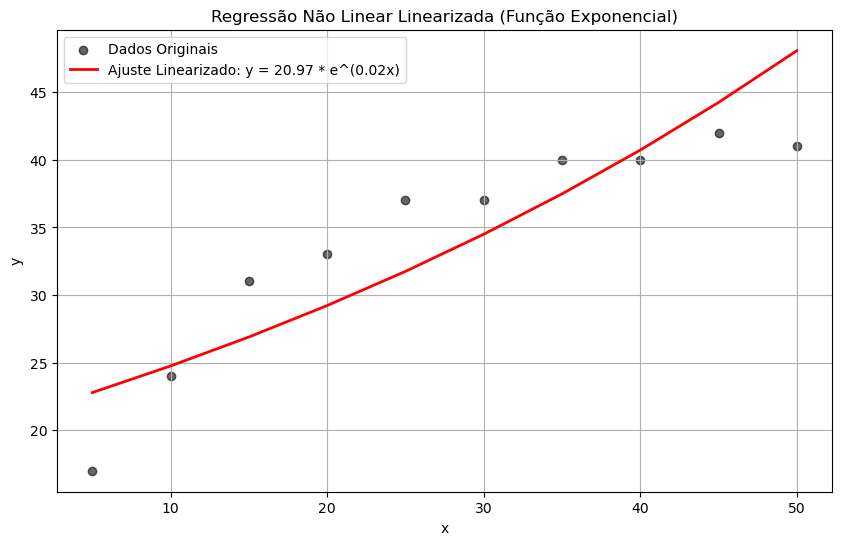

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Dados Originais", color="black", alpha=0.6)
plt.plot(x, (a0 * np.exp(a1 * x)), color="red", linewidth=2,
         label=f"Ajuste Linearizado: y = {a0:.2f} * e^({a1:.2f}x)")
plt.title("Regressão Não Linear Linearizada (Função Exponencial)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

#### c) y = αx / (β + x)

In [113]:
x_div :NDArray = 1 / x
y_div :NDArray = 1 / y
alfa_estimado, beta_estimado, erro_padrao_estimativa, r2 = linear_regression(x_div, y_div)
print("alfa estimado: ", alfa_estimado, "\nBeta estimado: ", beta_estimado)

alfa estimado:  0.0199632204843966 
Beta estimado:  0.197463573841957


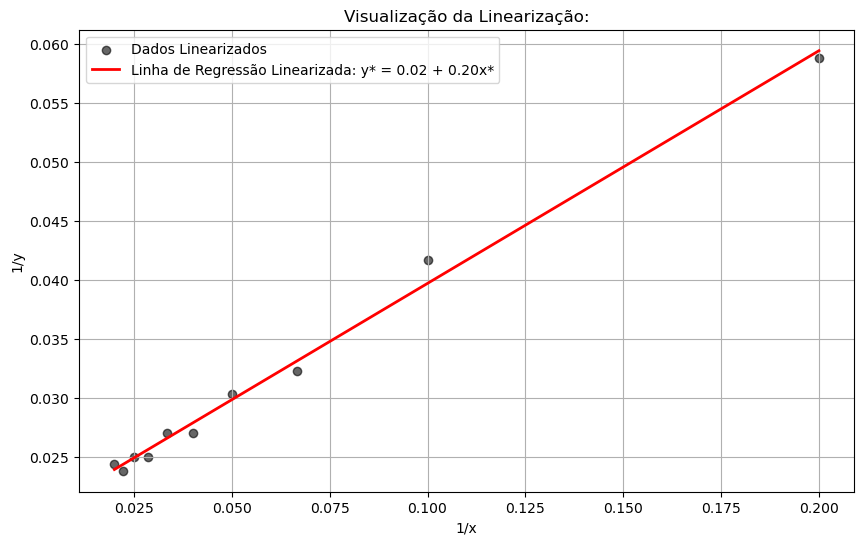

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(x_div, y_div, label="Dados Linearizados", color="black", alpha=0.6)
plt.plot(x_div, (alfa_estimado + beta_estimado * x_div), color="red", linewidth=2,
         label=f"Linha de Regressão Linearizada: y* = {alfa_estimado:.2f} + {beta_estimado:.2f}x*")
plt.title("Visualização da Linearização:")
plt.xlabel("1/x")
plt.ylabel("1/y")
plt.grid(True)
plt.legend()
plt.show()

In [118]:
a0 = 1 / alfa_estimado
a1 = beta_estimado * a0
print("a0 = ", a0, "\na1 = ", a1)
print("Erro padrão da estimativa: ", erro_padrao_estimativa)
print("Coeficiente de determinação (r^2): ", r2)

a0 =  50.092118192132745 
a1 =  9.891368679532242
Erro padrão da estimativa:  0.0009374438801369636
Coeficiente de determinação (r^2):  0.9991633002807232


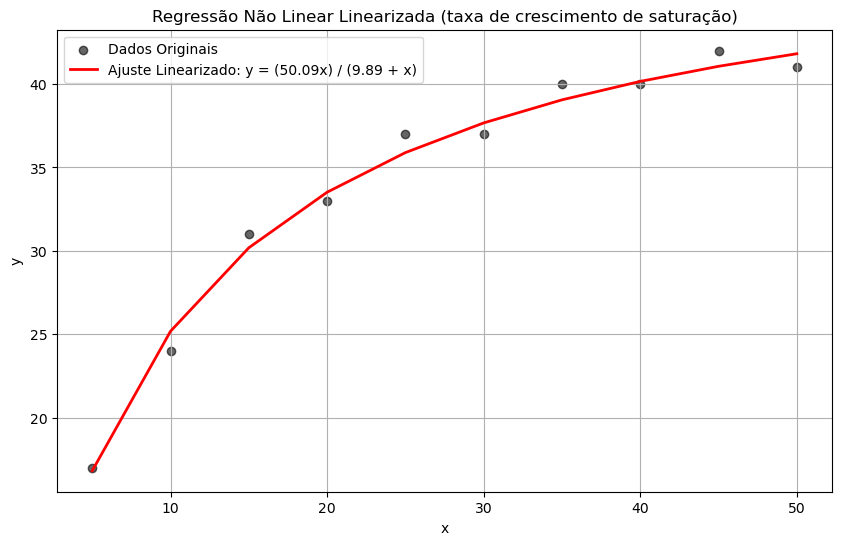

In [119]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Dados Originais", color="black", alpha=0.6)
plt.plot(x, (a0 * x / (a1 + x)), color="red", linewidth=2,
         label=f"Ajuste Linearizado: y = ({a0:.2f}x) / ({a1:.2f} + x)")
plt.title("Regressão Não Linear Linearizada (taxa de crescimento de saturação)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

#### d) Uma parábola

In [ ]:
grau :int = 2
matriz_aumentada :NDArray = create_augmented_matrix(x, y, grau)
A :NDArray = 
b :NDArray =